# Import

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import math 
from skimage import data,io
from skimage.color import rgb2gray
from skimage.data import astronaut
from skimage.filters import difference_of_gaussians
import cv2 as cv
from scipy.ndimage.filters import convolve
from PIL import Image
import scipy.misc
import random

<ipython-input-39-1974d57f1985>:9: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import convolve


# Import image

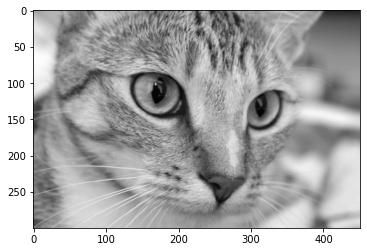

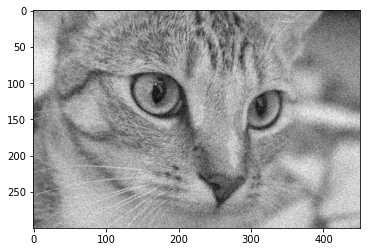

In [ ]:
image = data.chelsea()

grayscale = np.zeros((image.shape[0],image.shape[1]))
for x in range(0,image.shape[0]):
  for y in range(0,image.shape[1]):
    grayscale[x][y] = int(image[x][y][0] *  0.2125 + image[x][y][1] *  0.7154  + image[x][y][2] * 0.0721)

randomscale = np.zeros((image.shape[0],image.shape[1]))
for x in range(0,image.shape[0]):
  for y in range(0,image.shape[1]):
    randomscale[x][y] = int(image[x][y][0] *  0.2125 + image[x][y][1] *  0.7154  + image[x][y][2] * 0.0721) + random.randint(0,50)

plt.figure(1)
plt.imshow(grayscale, cmap='gray')
plt.figure(2)
plt.imshow(randomscale,cmap='gray')


# Function

## Spatial matrix

In [ ]:
# size refer to window_size
def spitial_matrix(size,spitial_std_dev):
  spital_matrix = np.zeros((size,size),dtype = float)
  center = math.floor(size/2)
  for x in range(0,size):
    for y in range(0,size):
      spital_matrix[x][y] = math.exp(-((x-center)**2 + (y-center)**2)/(2*spitial_std_dev**2))
  #print("spital:\n",spital_matrix)
  return spital_matrix    
S_matrix = spitial_matrix(5,1)
print(S_matrix)


[[0.01831564 0.082085   0.13533528 0.082085   0.01831564]
 [0.082085   0.36787944 0.60653066 0.36787944 0.082085  ]
 [0.13533528 0.60653066 1.         0.60653066 0.13533528]
 [0.082085   0.36787944 0.60653066 0.36787944 0.082085  ]
 [0.01831564 0.082085   0.13533528 0.082085   0.01831564]]


## Intensity Matrix

[[0.13533528 0.32465247 1.         0.8824969  0.60653066]
 [0.13533528 0.32465247 1.         0.8824969  0.60653066]
 [0.13533528 0.32465247 1.         0.8824969  0.60653066]
 [0.13533528 0.32465247 1.         0.8824969  0.60653066]
 [0.13533528 0.32465247 1.         0.8824969  0.60653066]]


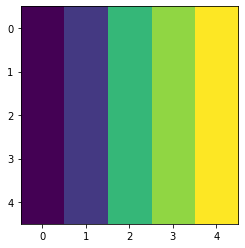

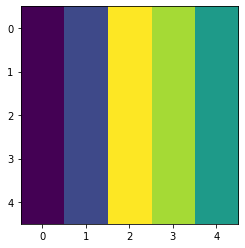

In [ ]:
# size refer to window_size
def intensity_matrix(size,range_std_dev,matrix):
    intensity_matrix = np.zeros((size,size),dtype = float)
    #print(intensity_matrix)
    center = math.floor(size/2)
    #print(matrix[center][center])
    for x in range(0,size):
      for y in range(0,size):
        #print(matrix[x][y])
        intensity_matrix[x][y] = math.exp(-((matrix[x][y]-matrix[center][center])**2)/(2*range_std_dev**2))
    #print("intensity:\n",intensity_matrix)
    return intensity_matrix

pixel_matrix = np.array([[0,5,20,25,30],
                         [0,5,20,25,30],
                         [0,5,20,25,30],
                         [0,5,20,25,30],
                         [0,5,20,25,30]])
I_matrix = intensity_matrix(5,10,pixel_matrix)
print(I_matrix)
plt.imshow(pixel_matrix)
plt.show()
plt.imshow(I_matrix)
# print(I_matrix.sum())

## Combines

In [ ]:
def combined(S_matrix,I_matrix):
  combined = np.multiply(S_matrix, I_matrix)
  #print("combined:\n",combined,"\n")

  total = combined.sum()
  #print("total:\n",total,"\n")

  filter = np.multiply(combined,1/total)
  #print("filter: \n",filter,"\n")
 # print("new value:\n",adjusted_pt)
  return filter
print(combined(S_matrix,I_matrix))


[[0.00054459 0.00585486 0.02973342 0.01591515 0.00244067]
 [0.00244067 0.02623965 0.13325594 0.07132677 0.01093831]
 [0.00402398 0.04326187 0.21970191 0.11759796 0.01803423]
 [0.00244067 0.02623965 0.13325594 0.07132677 0.01093831]
 [0.00054459 0.00585486 0.02973342 0.01591515 0.00244067]]


##padding

In [ ]:
def padding(window_size,image_size,image_matrix):
  numberofpadding = math.floor(window_size/2)
  padding_size = numberofpadding * 2
  padding_image = image_matrix

  columnsOfZeros = np.zeros((image_size[0],1))
 #print(columnsOfZeros.shape)
  rowOfZeros = np.zeros((1,(image_size[1]+padding_size)))
 # print(rowOfZeros)
  #print(padding_image)
  for iteration in range(0,numberofpadding):
   # print("iteration Col: ",iteration)
    padding_image = np.append(columnsOfZeros,padding_image, axis=1)
    padding_image = np.append(padding_image,columnsOfZeros, axis=1)
   # print(padding_image,"\n")

  for iteration in range(0,numberofpadding):  
   # print("iteration Row: ",iteration)  
    padding_image = np.append(padding_image,rowOfZeros, axis=0)
    padding_image = np.append(rowOfZeros,padding_image,axis=0)
   # print(padding_image,"\n")

  return padding_image
#paddedimage = padding(3,gray_image.shape,gray_image)

In [ ]:
def select_matrix(window_size,image,centerpoint):
  grab_length = math.floor(window_size/2)
  selected_pixels = np.array([image[ centerpoint[0]-grab_length ][ centerpoint[1]-grab_length : centerpoint[1]+grab_length + 1 ]])
  for row in range(1,window_size):
    holder_pixels = np.array([image[ centerpoint[0]-grab_length + row ][ centerpoint[1]-grab_length : centerpoint[1]+grab_length + 1 ]])
    selected_pixels = np.append(selected_pixels,holder_pixels,axis=0)
  #print(selected_matrix)
  return selected_pixels  

In [ ]:

def apply(centerpoint,window_size,range_std_dev,S_matrix,image):
  selected_pixels = select_matrix(window_size,image,centerpoint)
  #print("selected: \n",selected_pixels)
  I_matrix = intensity_matrix(window_size,range_std_dev,selected_pixels)
  filter = combined(S_matrix,I_matrix)
  new_map = np.multiply(filter, selected_pixels)
  new_value = new_map.sum()
  return new_value

In [ ]:
def bilateral_filter(image,sigma_S,sigma_R,windowsize):
  paddedimage = padding(windowsize,image.shape,image)
  #print(paddedimage)
  #print(windowsize)
  S_matrix = spitial_matrix(windowsize,sigma_S)
  offset = math.floor(windowsize/2)
  #print(offset)
  countx = 0
  county = 0
  final_image = np.zeros((image.shape))
  #print(final_image)
  #print(final_image[countx][county])
  #print(S_matrix)
  for x in range(offset,paddedimage.shape[0]-offset):
    for y in range(offset,paddedimage.shape[1]-offset):
      centerpoint = [x,y]
      #print(x,y)
      final_image[countx][county] = apply(centerpoint=centerpoint, window_size = windowsize,range_std_dev = sigma_R,S_matrix = S_matrix,image = paddedimage)
      #print(final_image)
      county+=1
    countx+=1
    county = 0

  return final_image  

# Testing


Differnce between OG - bilateral filter verison: -423.7931620128136
Differnce between OG & Gaussian blur: 147.0731280134766
Differnce between OG & bilateral filter blur verison: 520.4832883397278
Differnce between OG & Average blur: -3.311981799924979e-10
Differnce between OG & Averaged Image bilateral fliter: 378.70247052418904
Differnce between OG & My Gaussian Blur: -1261454207.3257241
Differnce between OG & My Gaussian Blur filtered: -1261458302.5076973


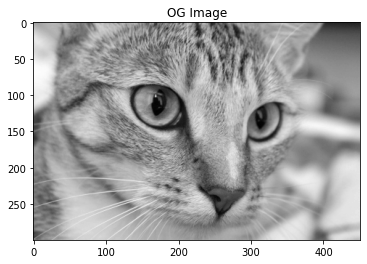

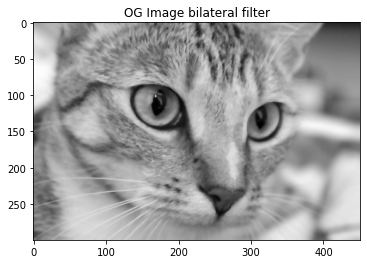

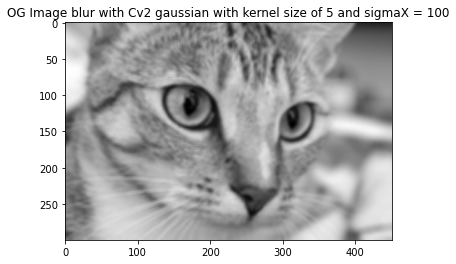

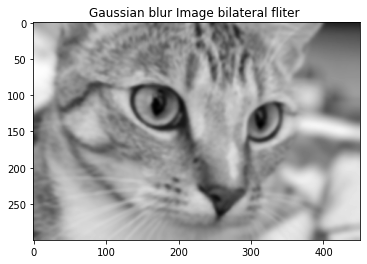

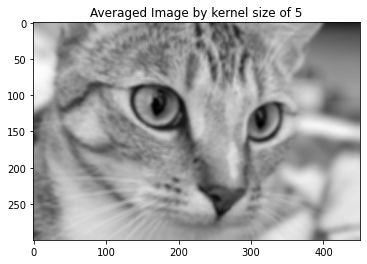

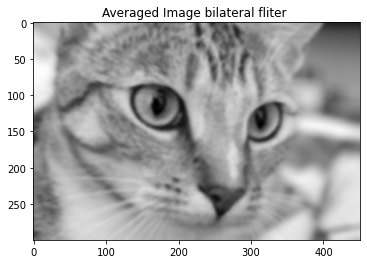

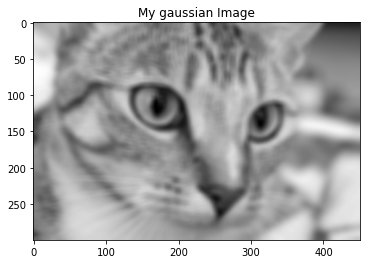

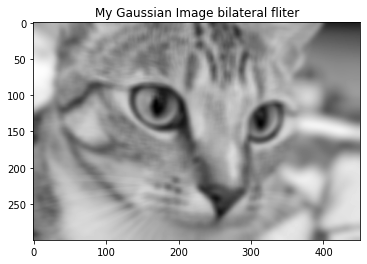

In [ ]:
plt.figure(1)
plt.imshow(grayscale, cmap='gray')
plt.title('OG Image')
range_std = 25
spatial_std = 1

reg_img_filter = bilateral_filter(grayscale,spatial_std,range_std,5)
plt.figure(2)
plt.imshow(reg_img_filter, cmap='gray')
plt.title('OG Image bilateral filter')
print("Differnce between OG - bilateral filter verison:",((grayscale - reg_img_filter).sum()))

Gaussianblur = cv.GaussianBlur(src = grayscale,ksize =(5,5),sigmaX = 100)
plt.figure(3)
plt.imshow(Gaussianblur, cmap='gray')
plt.title('OG Image blur with Cv2 gaussian with kernel size of 5 and sigmaX = 100')
print("Differnce between OG & Gaussian blur:",((grayscale - Gaussianblur).sum()))

Gaussianfilter = bilateral_filter(Gaussianblur,spatial_std,range_std,5)
plt.figure(4)
plt.imshow(Gaussianfilter, cmap='gray')
plt.title('Gaussian blur Image bilateral fliter ')
print("Differnce between OG & bilateral filter blur verison:",(grayscale-Gaussianfilter).sum())

average_kernel = [[1/25,1/25,1/25,1/25,1/25],
                  [1/25,1/25,1/25,1/25,1/25],
                  [1/25,1/25,1/25,1/25,1/25],
                  [1/25,1/25,1/25,1/25,1/25],
                  [1/25,1/25,1/25,1/25,1/25]]
img_avg = convolve(grayscale, average_kernel)
plt.figure(5)
plt.imshow(img_avg, cmap='gray')
plt.title('Averaged Image by kernel size of 5')
print("Differnce between OG & Average blur:",((grayscale - img_avg).sum()))

Avgfilter = bilateral_filter(img_avg,spatial_std,range_std,5)
plt.figure(6)
plt.imshow(Avgfilter, cmap='gray')
plt.title('Averaged Image bilateral fliter ')
print("Differnce between OG & Averaged Image bilateral fliter:",((grayscale - Avgfilter).sum()))

gaussian = spitial_matrix(9,50)
gaussian_img = convolve(grayscale, gaussian)
plt.figure(7)
plt.imshow(gaussian_img, cmap='gray')
plt.title('My gaussian Image')
print("Differnce between OG & My Gaussian Blur:",(grayscale-gaussian_img).sum())

MyGaussianfilter = bilateral_filter(gaussian_img,spatial_std,range_std,5)
plt.figure(8)
plt.imshow(MyGaussianfilter, cmap='gray')
plt.title('My Gaussian Image bilateral fliter')
print("Differnce between OG & My Gaussian Blur filtered:",(grayscale-MyGaussianfilter).sum())

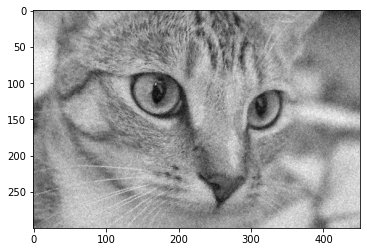

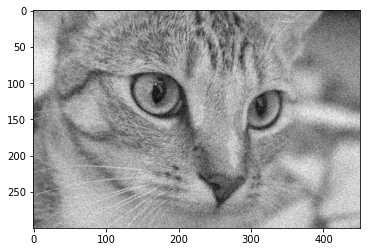

In [ ]:
bfrandomscale = bilateral_filter(randomscale,5,15,3)
plt.figure(9)
plt.imshow(bfrandomscale, cmap='gray')
plt.figure(10)
plt.imshow(randomscale, cmap='gray')
io.imsave("filtered.png",bfrandomscale)
io.imsave("noisey.png",randomscale)